In [1]:
import numpy as np
def myFunc(x,alpha=9.745,gamma=0.09146):
    epsilon=0.5/np.sqrt(alpha)
    damp = 1.0 - np.exp(-gamma*x**3)
    return epsilon - np.sqrt(epsilon*epsilon + epsilon*alpha*damp*damp/(x**4))

Populating the interactive namespace from numpy and matplotlib


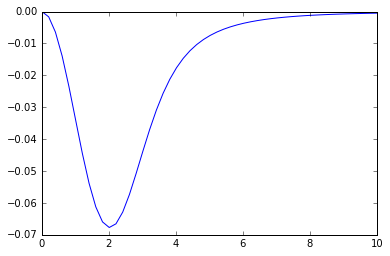

In [2]:
%pylab inline
x=np.linspace(0.0001,40,200)
y=myFunc(x)
xlim(0,10)
plot(x,y)

In [4]:
from scipy.optimize import leastsq

In [5]:
def gauss3(x,fit,s=2.8):
    """x is the independent variable; fit is a tuple of weights"""
    return -fit[1]*exp(-fit[0]*x*x) + \
            fit[2]*exp(-fit[0]/s*x*x) + \
            fit[3]*exp(-fit[0]/(s**2)*x*x)
def residual(fit,x,y):
    return gauss3(x,fit)-y

In [7]:
guess=(1,1,1,1)
fit3,success=leastsq(residual,guess,args=(x,y))
print(fit3,success)

[ 1.13512419  0.0073269   0.19493464 -0.18719152] 1


Populating the interactive namespace from numpy and matplotlib


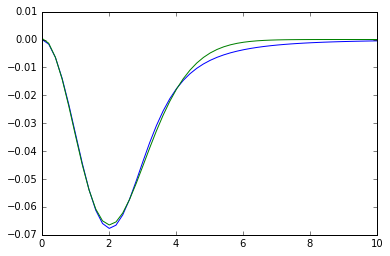

In [8]:
%pylab inline
x=np.linspace(0.0001,40,200)
y1=myFunc(x)
y2=gauss3(x,fit3)
xlim(0,10)
plot(x,y,'b',label='myFunc')
plot(x,y2,'g',label='3 gaussians')